In [40]:
import os.path
import numpy as np
import pickle
from sklearn.ensemble import RandomForestRegressor
from bayes_opt import BayesianOptimization
from sklearn import metrics
import pandas as pd

In [232]:
# define functions

def mean_absolute_percentage_error(y_true, y_pred): 

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mean_absolute_range_percentage_error(y_true, y_pred): 
    error = np.abs((y_val- y_pred))-10000
    error[error < 0] = 0
    return np.mean(error/y_true)*100


In [7]:
path = os.getcwd()

In [202]:
with open(path + '/data/OHE.pkl', 'rb') as file:
    OHE_train,OHE_val,OHE_test,feature_names_OHE = pickle.load(file)
with open(path + '/data/TFIDF.pkl', 'rb') as file:
    TFIDF_train,TFIDF_val,TFIDF_test,feature_names_TFIDF = pickle.load(file)
with open(path + '/data/BOG.pkl', 'rb') as file:
    BOG_train,BOG_val,BOG_test,feature_names_BOG = pickle.load(file)
with open(path + '/data/TECH.pkl', 'rb') as file:    
    TECH_train,TECH_val,TECH_test,feature_names_TECH = pickle.load(file)
with open(path + '/data/yTrainValTest.pkl', 'rb') as file:
        y_train,y_val,y_test= pickle.load(file) 
    

In [217]:
OHE_train.shape[0]+OHE_val.shape[0]+OHE_test.shape[0]

5886

In [258]:
X_train = pd.DataFrame(np.hstack((OHE_train,TECH_train)), columns = list(feature_names_OHE)+list(feature_names_TECH))
X_val = pd.DataFrame(np.hstack((OHE_val,TECH_val)), columns =list(feature_names_OHE)+list(feature_names_TECH))
X_test = pd.DataFrame(np.hstack((OHE_test,TECH_test)), columns = list(feature_names_OHE)+list(feature_names_TECH))

In [259]:
#remove 'company' variables
cols = [c for c in X_train.columns if 'company_' not in c]

In [260]:
X_train = X_train[cols]
X_val = X_val[cols]
X_test = X_test[cols]
feature_names = cols

In [261]:
params = {'n_estimators':200,'max_depth': 20, 'n_jobs':-1}

In [262]:
# Create the model with 100 trees
model = RandomForestRegressor(**params)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [263]:
# Actual predictions
y_pred = model.predict(X_val)
# Probabilities for each class
feature_importances = model.feature_importances_

In [264]:
    print('Mean Absolute Error: {0:.0f}'.format( metrics.mean_absolute_error(y_val, y_pred)))
    print('Mean Absolute Percentage Error: {0:.1f}'.format(mean_absolute_percentage_error(y_val, y_pred)))
    print('Mean Absolute Range Percentage Error: {0:.1f}'.format(mean_absolute_range_percentage_error(y_val, y_pred)))
    
    print('Mean Squared Error: {0:.0f}'.format(metrics.mean_squared_error(y_val, y_pred)))
    print('Root Mean Squared Error:{0:.0f}'.format(np.sqrt(metrics.mean_squared_error(y_val, y_pred))))
    print('R2 Score:{0:.2f}'.format(np.sqrt(metrics.r2_score(y_val, y_pred))))

Mean Absolute Error: 16737
Mean Absolute Percentage Error: 32.3
Mean Absolute Range Percentage Error: 15.5
Mean Squared Error: 520195962
Root Mean Squared Error:22808
R2 Score:0.81


In [265]:
features = pd.concat([pd.DataFrame(feature_names),pd.DataFrame(feature_importances)],axis = 1)
features.columns = ['feature','importance']

In [266]:
features.sort_values(by='importance', ascending = False).head(40)

,feature,importance
7,country_USA,0.508247
394,python,0.064900
31,region_London,0.043741
337,machine learning,0.043374
14,region_California,0.021499
656,sql,0.014319
6,country_UK,0.013393
888,big data,0.013316
1060,nlp,0.012601
139,agile,0.011655


In [275]:
import matplotlib.pyplot as plt


In [268]:
error = y_pred-y_val

# need to run encodings seperately, drop companies, change parameters.

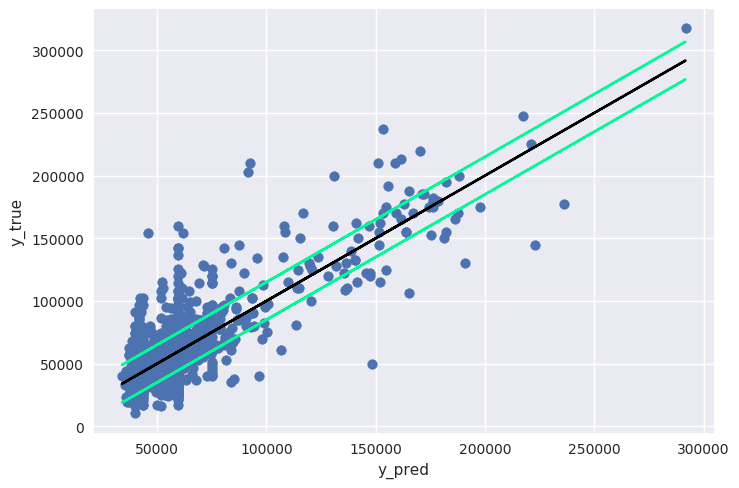

In [296]:
with plt.style.context('seaborn'):
    ax = plt.scatter(y_pred,y_val)
    plt.plot(y_pred, y_pred, color='black')
    plt.plot(y_pred, y_pred-15000, color='mediumspringgreen')
    plt.plot(y_pred, y_pred+15000, color='mediumspringgreen')
    plt.xlabel('y_pred')
    plt.ylabel('y_true')

In [ ]:
# mixed density network, # use clustering to generate features # try by country, #regional encoding